In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math

In [65]:
path ='/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/'
raw_data = sio.loadmat(path + 'Simulation_noisy_SiDisl_slc5_1000FPS.mat')
raw_data = raw_data['datacube']

truth_data = np.load(path + 'Simulation_truth_SiDisl_slc5_1000FPS.npy')

denoised_data = sio.loadmat(path + 'Simulation_tensor_SiDisl_slc5_1000FPS.mat')
denoised_data = denoised_data['est_HOOI']

In [66]:
print(raw_data.shape)
print(denoised_data.shape)
print(truth_data.shape)

(114, 114, 16384)
(114, 114, 16384)
(114, 114, 16384)


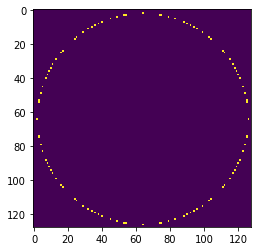

In [67]:
# A circular mask with less points can be generated by using a smaller gap between two radii
circular_mask = create_circular_mask(128, 128, center=(64,64), radius=62) & \
~create_circular_mask(128, 128, center=(64,64), radius=61.7)
plt.imshow(circular_mask)
ADF_noisy = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_denoised = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_truth = np.zeros((raw_data.shape[0],raw_data.shape[1]))

for i in range(128):
    for j in range(128):
        if circular_mask[i,j] == 1:
            ADF_noisy = ADF_noisy + raw_data[:,:,i*128+j]
            ADF_denoised = ADF_denoised + denoised_data[:,:,i*128+j]
            ADF_truth = ADF_truth + truth_data[:,:,i*128+j]

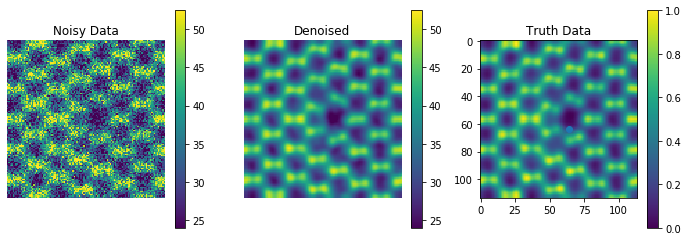

In [68]:
# Compare real space structure from ADF reconstrcutred from a ring with width = 1
plt.figure(figsize=(12,4))
clim_low = np.amin(ADF_truth)
clim_high = np.amax(ADF_truth)

plt.subplot(132)
plt.imshow(ADF_denoised,clim=[clim_low,clim_high])
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(131)
plt.imshow(ADF_noisy,clim=[clim_low,clim_high])
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(133)
plt.imshow(ADF_truth,clim=[clim_low,clim_high])
plt.title('Truth Data')
plt.scatter(64,64)
# plt.axis('off')
plt.colorbar()

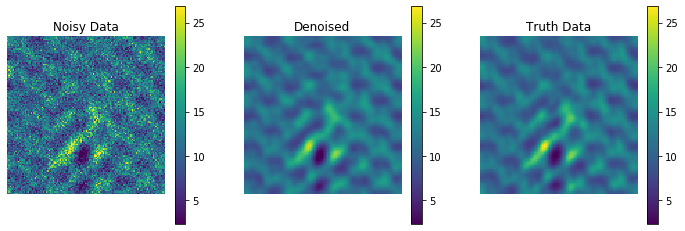

In [69]:
# Compare real space structure from single kx,ky
plt.figure(figsize=(12,4))
iframe = 10000
clim_low = np.amin(truth_data[:,:,iframe])
clim_high = np.amax(truth_data[:,:,iframe])

plt.subplot(132)
plt.imshow(denoised_data[:,:,iframe],clim=[clim_low,clim_high])
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(131)
plt.imshow(raw_data[:,:,iframe],clim=[clim_low,clim_high])
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(133)
plt.imshow(truth_data[:,:,iframe],clim=[clim_low,clim_high])
plt.title('Truth Data')
plt.axis('off')
plt.colorbar()

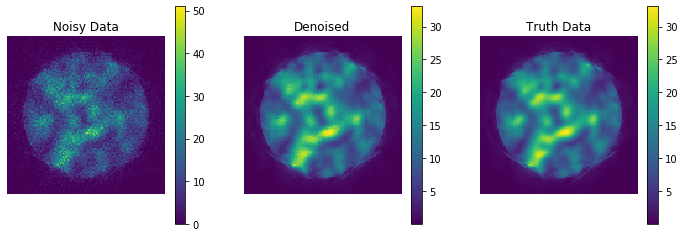

In [70]:
# Compare CBED from single rx,ry
plt.figure(figsize=(12,4))
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

plt.subplot(132)
plt.imshow(denoised_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high])
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(131)
plt.imshow(raw_data[rx,ry,:].reshape(128,128))
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(133)
plt.imshow(truth_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high])
plt.title('Truth Data')
plt.axis('off')
plt.colorbar()

# print(psnr(truth_data[rx,ry,:].reshape(128,128),tensor_data[rx,ry,:].reshape(128,128)))

In [83]:
# Plot input vs output psnr
FPS_list = [1000,2000,4000,6000,8000,10000,20000,40000]
# FPS_list = [1000]
PSNR_list = np.zeros((2,len(FPS_list)))
path = '/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/'
for i in range(len(FPS_list)):
    FPS = FPS_list[i]
    truth_file = path + 'Simulation_truth_SiDisl_slc5_'+str(FPS)+'FPS.npy'
    noisy_file = path + 'Simulation_noisy_SiDisl_slc5_'+str(FPS)+'FPS.mat'
    denoise_file = path + 'Simulation_tensor_SiDisl_slc5_'+str(FPS)+'FPS.mat'
    truth_file = np.load(truth_file)
    noisy_file = sio.loadmat(noisy_file)
    noisy_file = noisy_file['datacube']

    denoise_file = sio.loadmat(denoise_file)
    denoise_file = denoise_file['est_HOOI']
    
    PSNR_list[0,i] = averagePSNR(denoise_file,truth_file,0)
    PSNR_list[1,i] = averagePSNR(noisy_file,truth_file,0)
    print(FPS)
    print(PSNR_list[:,i])
#     print(averagePSNR(denoise_file,truth_file,0))
#     print(averagePSNR(noisy_file,truth_file,0))

1000
[38.79368233 22.50108175]
2000
[36.40105536 19.49065378]
4000
[33.47052371 16.48114712]
6000
[31.6484955  14.71876248]
8000
[30.35482474 13.47011772]
10000
[29.34725529 12.50235443]
20000
[26.23870808  9.49156934]
40000
[23.19263617  6.48055193]


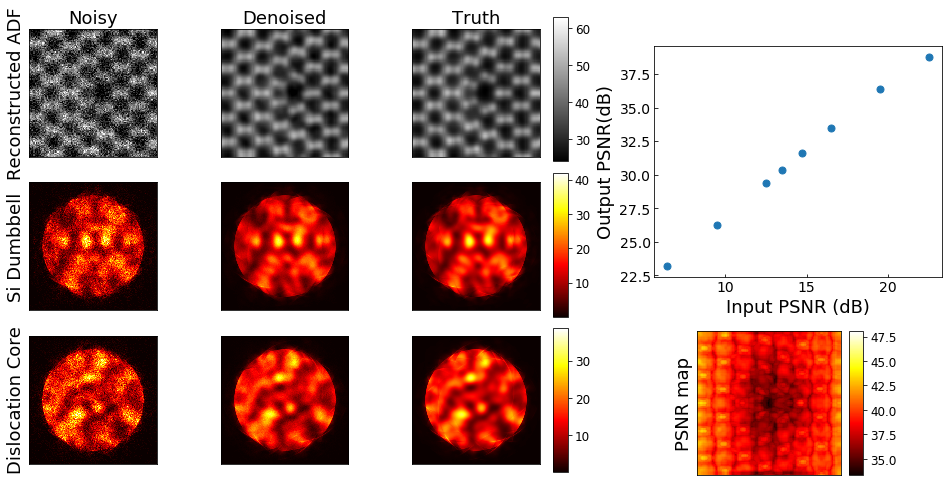

In [84]:
# overall plot
fig = plt.figure(figsize=(20,8))
clim_low = np.amin(ADF_truth)
clim_high = np.amax(ADF_truth)


fig.add_subplot(361)
plt.imshow(ADF_noisy,clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=18)
plt.ylabel('Reconstructed ADF', fontsize=18)

fig.add_subplot(362)
plt.imshow(ADF_denoised,clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Denoised',fontsize=18)

ax = fig.add_subplot(363)
im = plt.imshow(ADF_truth,clim=[clim_low,clim_high*1.2],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Truth',fontsize=18)

cax = fig.add_axes([0.50,0.65,0.01,0.25])
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=12)


# plot CBED patterns
rx = 10
ry = 10
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

fig.add_subplot(367)
plt.imshow(raw_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('Si Dumbbell', fontsize=18)

fig.add_subplot(368)
plt.imshow(denoised_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(369)
im = plt.imshow(truth_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# divider = make_axes_locatable(ax)

cax = fig.add_axes([0.50,0.38,0.01,0.25])
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label('Electron Counts',rotation=270,fontsize=14)

rx = 50
ry = 60
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

fig.add_subplot(3,6,13)
plt.imshow(raw_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
plt.ylabel('Dislocation Core', fontsize=18)

fig.add_subplot(3,6,14)
plt.imshow(denoised_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(3,6,15)
im = plt.imshow(truth_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high*1.2],cmap='hot')
plt.xticks([])
plt.yticks([])
# divider = make_axes_locatable(ax)

cax = fig.add_axes([0.50,0.11,0.01,0.25])
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=12)

ax3 = fig.add_axes([0.57,0.45,0.2,0.4])
# ax3 = plt.subplot2grid((2, 7), (0, 5), colspan=2, rowspan=2)
ax3.plot(PSNR_list[1,:], PSNR_list[0,:], '.',markersize=14)
plt.xlabel('Input PSNR (dB)',fontsize=18)
plt.ylabel('Output PSNR(dB)',fontsize=18)
ax3.tick_params(direction='in',labelsize = 14)

ax4 = fig.add_axes([0.525,0.105,0.25,0.25])
im = ax4.imshow(psnr_map,cmap='hot',clim=[np.amin(psnr_map),np.amax(psnr_map)*1.1])
ax4.set_ylabel('PSNR map',fontsize=18)
ax4.set_xticks([])
ax4.set_yticks([])
cax = fig.add_axes([0.705,0.105,0.01,0.25])
cbar = plt.colorbar(im,cax = cax)
cbar.ax.tick_params(labelsize=12)

# fig.subplots_adjust(wspace = 0.1, hspace = 0.1)
fig.savefig('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/SiDisl_tensor_result.tif')

In [80]:
# calculate PSNR for each real space position, result in Decibel
psnr_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))
for irow in range(truth_data.shape[0]):
    for icol in range(truth_data.shape[1]):
        truth = truth_data[irow,icol,:].reshape(128,128)
        denoise = denoised_data[irow,icol,:].reshape(128,128)
        psnr_map[irow,icol] = psnr(truth,denoise)

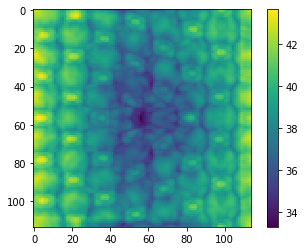

In [81]:
plt.imshow(psnr_map)
plt.colorbar()

0.9015634453798869


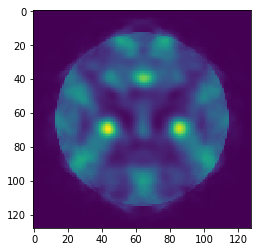

In [109]:
# calculate SSIM for each real space position, result in Decibel
from skimage import data, img_as_float
from skimage.measure import compare_ssim
ssim_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))

print(score)
plt.imshow(truth)
for irow in range(truth_data.shape[0]):
    for icol in range(truth_data.shape[1]):
        truth = truth_data[irow,icol,:].reshape(128,128)
        denoise = denoised_data[irow,icol,:].reshape(128,128)
        (score, diff) = compare_ssim(truth, denoise, full=True)
        ssim_map[irow,icol] = score

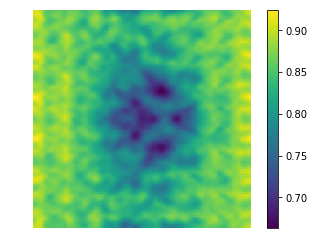

In [110]:
plt.imshow(ssim_map)
plt.axis('off')
plt.colorbar()

(-0.5, 113.5, 113.5, -0.5)

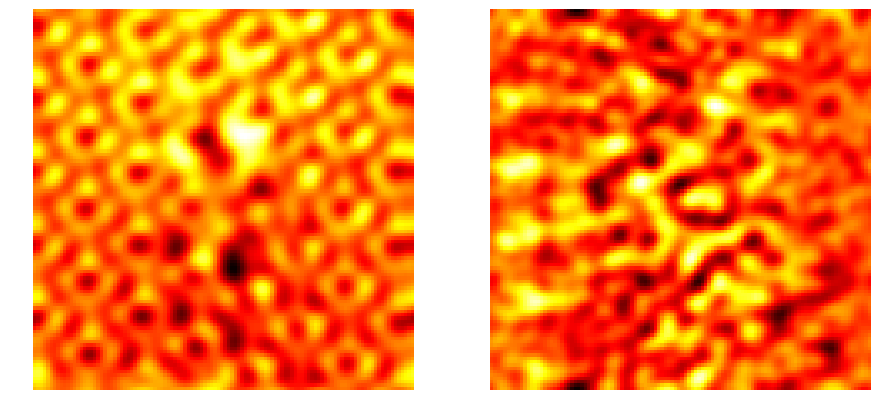

In [204]:
# Visulize different components along the third dimension
path ='/srv/home/chenyu/TensorDenoise/VisulizeComponent/'
raw_data = sio.loadmat(path + 'Components_SiDisl_slc5_1000FPS_fullsize.mat')
raw_data = raw_data['prototype']

fig = plt.figure(figsize=(15,8))
fig.add_subplot(121)
plt.imshow(raw_data[:,:,20],cmap='hot')
plt.axis('off')

fig.add_subplot(122)
plt.imshow(raw_data[:,:,99],cmap='hot')
plt.axis('off')

In [67]:
# calculate PSNR for each mrad collection angle
kx = 128
ky = 128
kx = np.linspace(0,kx-1,kx)
ky = np.linspace(0,ky-1,ky)
weights_x, weights_y = np.meshgrid(kx,ky)
kx2,ky2 = np.meshgrid(kx,ky)
distance_from_center = np.sqrt((kx2 - 64)**2 + (ky2 - 64)**2)
psnr_profile = np.zeros((1,math.floor(np.amax(distance_from_center))))

for iangle in range(math.floor(np.amax(distance_from_center))):
    mask = (distance_from_center > iangle) & (distance_from_center < iangle + 1)
    mask_line = mask.reshape(128*128)
    truth = np.sum(truth_data * mask_line, axis=2)
    denoise = np.sum(tensor_data * mask_line, axis=2)
    psnr_profile[0,iangle] = psnr(truth, denoise)

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Text(0.5, 0, 'Components')

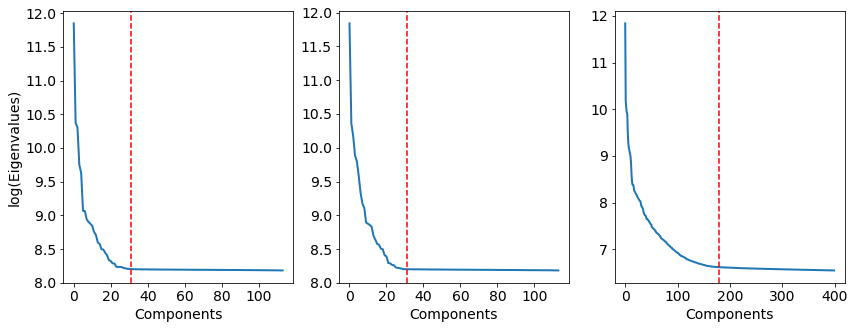

In [86]:
# Analysis eigenvalues
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_1000FPS_eigenvalue.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=31,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=31,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:400]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=180,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

0.11565843738941192


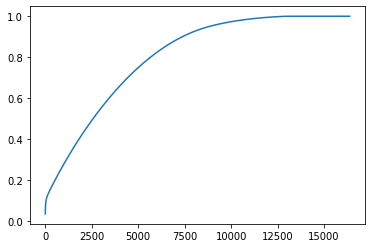

In [25]:
e3 = temp['e3']
e3 = e3[::-1]
scree = (np.cumsum(e3)/np.sum(e3))
plt.plot(scree)
print(scree[80])

[0.93610565]


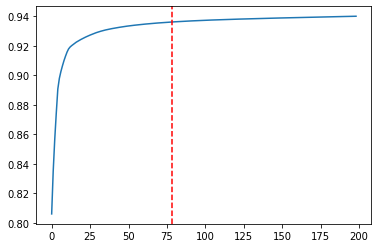

In [52]:
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_1000FPS_eigenvalue.mat')
scree = temp['scree3']
scree = scree[::-1]
plt.plot(scree[1:200])
plt.axvline(x=78,color='r',ls='--')
print(scree[80])

[[1.40253332e+01 3.07355954e+01 4.58526962e+01 6.19602300e+01
  7.81373111e+01 9.36824570e+01 1.12413375e+02 1.35891349e+02
  1.48367331e+02 1.59428265e+02 1.72615752e+02]
 [1.49382484e+05 1.49383246e+05 1.49383247e+05 1.49383247e+05
  1.49383247e+05 1.49383247e+05 1.49383247e+05 1.49383247e+05
  1.49383247e+05 1.49383247e+05 1.49383247e+05]
 [3.60202576e+01 3.60329783e+01 3.60329322e+01 3.60329305e+01
  3.60329310e+01 3.60329312e+01 3.60329313e+01 3.60329314e+01
  3.60329314e+01 3.60329314e+01 3.60329314e+01]]


Text(0.5, 0, 'Number of iterations')

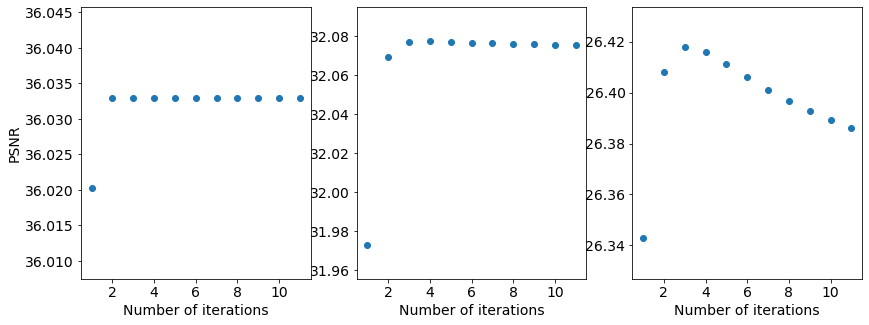

In [39]:
# Analysis eigenvalues for different noise levels
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_1000FPS_convergence.mat')
temp = temp['result_list']
temp = temp[:,0:11]

temp2 = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_10000FPS_convergence.mat')
temp2 = temp2['result_list']
temp2 = temp2[:,0:11]

temp3 = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_40000FPS_convergence.mat')
temp3 = temp3['result_list']
temp3 = temp3[:,0:11]
print(temp)

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
plt.scatter(np.linspace(1,11,11),temp[2,:])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PSNR',fontsize=14)
plt.xlabel('Number of iterations',fontsize=14)

fig.add_subplot(132)
plt.scatter(np.linspace(1,11,11),temp2[2,:])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of iterations',fontsize=14)

fig.add_subplot(133)
plt.scatter(np.linspace(1,11,11),temp3[2,:])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of iterations',fontsize=14)

Text(0.5, 0, 'Components')

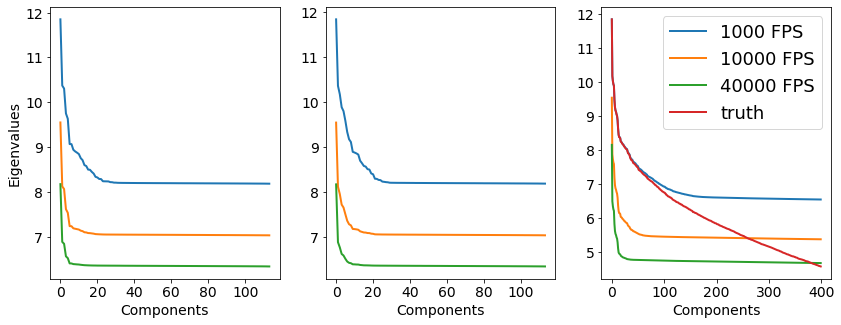

In [53]:
# Analysis eigenvalues for different noise levels
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_1000FPS_eigenvalue.mat')
temp2 = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_10000FPS_eigenvalue.mat')
temp3 = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_40000FPS_eigenvalue.mat')
temp4 = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_truth_SiDisl_slc5_1000FPS_eigenvalue.mat')


fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2',label = '1000 FPS')
e1 = temp2['e1']
plt.plot(np.log(e1[::-1]),linewidth='2',label = '10000 FPS')
e1 = temp3['e1']
plt.plot(np.log(e1[::-1]),linewidth='2',label = '40000 FPS')
# e1 = temp4['e1']
# plt.plot(np.log(e1[::-1]),linewidth='2',label = 'truth')
# plt.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2',label = '1000 FPS')
e2 = temp2['e2']
plt.plot(np.log(e2[::-1]),linewidth='2',label = '10000 FPS')
e2 = temp3['e2']
plt.plot(np.log(e2[::-1]),linewidth='2',label = '40000 FPS')
# e2 = temp4['e2']
# plt.plot(np.log(e2[::-1]),linewidth='2',label = 'truth')
# plt.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2',label = '1000 FPS')
e3 = temp2['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2',label = '10000 FPS')
e3 = temp3['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2',label = '40000 FPS')
e3 = temp4['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2',label = 'truth')
plt.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Components',fontsize=14)

Text(0, 0.5, 'Eigenvalues')

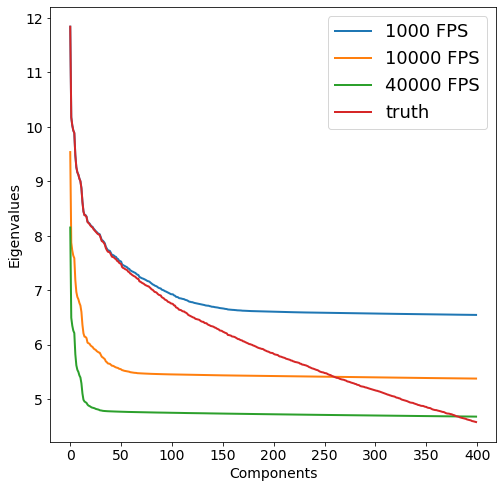

In [52]:
fig = plt.figure(figsize=(8,8))
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2',label = '1000 FPS')
e3 = temp2['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2',label = '10000 FPS')
e3 = temp3['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2',label = '40000 FPS')
e3 = temp4['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2',label = 'truth')
plt.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Components',fontsize=14)
plt.ylabel('Eigenvalues',fontsize=14)

## Denoise result and scree plot for 4D case

In [54]:
path ='/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/'
raw_data = sio.loadmat(path + 'Simulation_noisy_SiDisl_slc5_1000FPS.mat')
raw_data = raw_data['datacube']

truth_data = np.load(path + 'Simulation_truth_SiDisl_slc5_1000FPS.npy')

denoised_data = sio.loadmat(path + 'Simulation_tensor_SiDisl_slc5_1000FPS_32-32-24-24.mat')
denoised_data = denoised_data['est_HOOI']

In [55]:
denoised_data.shape

(114, 114, 128, 128)

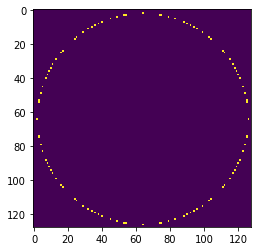

In [58]:
# A circular mask with less points can be generated by using a smaller gap between two radii
circular_mask = create_circular_mask(128, 128, center=(64,64), radius=62) & \
~create_circular_mask(128, 128, center=(64,64), radius=61.7)
plt.imshow(circular_mask)
ADF_noisy = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_denoised = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_truth = np.zeros((raw_data.shape[0],raw_data.shape[1]))

for i in range(128):
    for j in range(128):
        if circular_mask[i,j] == 1:
            ADF_noisy = ADF_noisy + raw_data[:,:,i*128+j]
            ADF_denoised = ADF_denoised + denoised_data[:,:,i,j]
            ADF_truth = ADF_truth + truth_data[:,:,i*128+j]

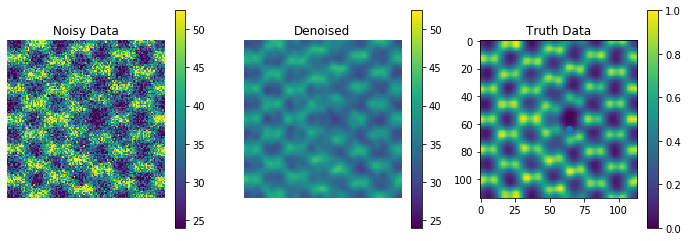

In [61]:
# Compare real space structure from ADF reconstrcutred from a ring with width = 1
plt.figure(figsize=(12,4))
clim_low = np.amin(ADF_truth)
clim_high = np.amax(ADF_truth)

plt.subplot(132)
plt.imshow(ADF_denoised,clim=[clim_low,clim_high])
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(131)
plt.imshow(ADF_noisy,clim=[clim_low,clim_high])
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(133)
plt.imshow(ADF_truth,clim=[clim_low,clim_high])
plt.title('Truth Data')
plt.scatter(64,64)
# plt.axis('off')
plt.colorbar()

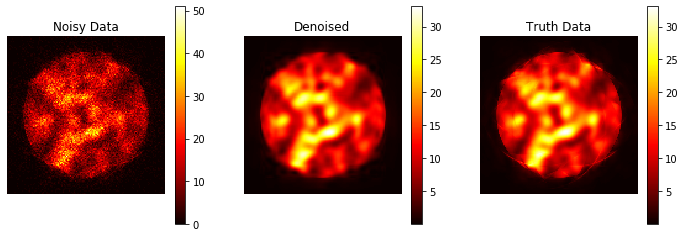

In [64]:
# Compare CBED from single rx,ry
plt.figure(figsize=(12,4))
rx = 50
ry = 50
clim_low = np.amin(truth_data[rx,ry,:])
clim_high = np.amax(truth_data[rx,ry,:])

plt.subplot(132)
plt.imshow(np.transpose(denoised_data[rx,ry,:].reshape(128,128)),clim=[clim_low,clim_high],cmap='hot')
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(131)
plt.imshow(raw_data[rx,ry,:].reshape(128,128),cmap='hot')
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(133)
plt.imshow(truth_data[rx,ry,:].reshape(128,128),clim=[clim_low,clim_high],cmap='hot')
plt.title('Truth Data')
plt.axis('off')
plt.colorbar()

# print(psnr(truth_data[rx,ry,:].reshape(128,128),tensor_data[rx,ry,:].reshape(128,128)))

Text(0.5, 0, 'Components')

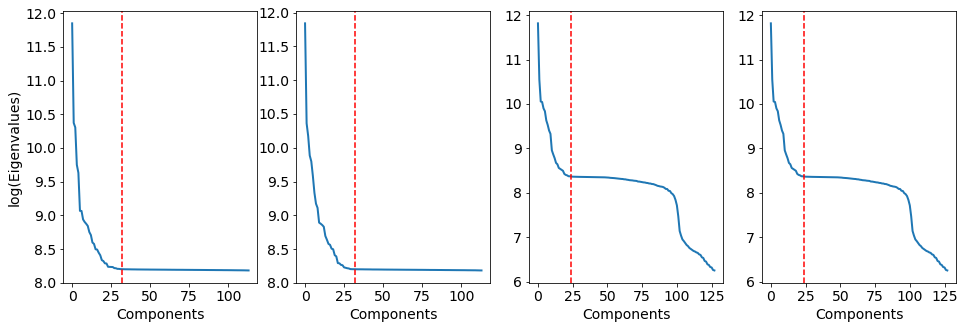

In [10]:
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/Simulation_noisy_SiDisl_slc5_1000FPS_4Deigenvalue.mat')
fig = plt.figure(figsize=(16,5))

fig.add_subplot(141)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=32,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(142)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.axvline(x=32,color='r',ls='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(143)
e3 = temp['e3']
plt.plot(np.log(e3[::-1]),linewidth='2')
plt.axvline(x=24,color='r',ls='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(144)
e4 = temp['e4']
plt.plot(np.log(e4[::-1]),linewidth='2')
plt.axvline(x=24,color='r',ls='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Components',fontsize=14)

In [77]:
# transpose_option = 1 for tensor denoised data, where first dimension is for rec space and need to be transposed to match simulation
# transpose_option = 0 for noisy data, third dimension is for rec space and no need to transpose
def averagePSNR(denoised_data,truth_data,transpose_option):
    side = np.sqrt(truth_data.shape[2])
    side = int(side)
    psnr_map = np.zeros((truth_data.shape[0],truth_data.shape[1]))
    for irow in range(truth_data.shape[0]):
        for icol in range(truth_data.shape[1]):
            truth = truth_data[irow,icol,:].reshape(side,side)
            if transpose_option == 1:
                denoise = np.transpose(denoised_data[:,irow,icol].reshape(side,side))
            else:
                denoise = denoised_data[irow,icol,:].reshape(side,side)
            psnr_map[irow,icol] = psnr(truth,denoise)
    return np.mean(psnr_map)

In [78]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [79]:
def psnr(truth, denoise):
    mse = np.mean( (truth - denoise) ** 2 )
    PIXEL_MAX = np.amax(truth)
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))